In [1]:
%matplotlib inline

import os 
import json
import pandas as pd

import pycoco as pcc

In [2]:
# output_dir = "/Users/berto/projects/SDSS_sims/SDSS_SESNE_1/lcs/"
output_dir = "/Users/berto/projects/SDSS_sims/lcs/"
# output_dir = "/Users/berto/projects/SDSS_sims/testing/lcs/"
outlist = os.listdir(output_dir)
outlist = [i for i in outlist if i != ".DS_Store"]

# log_dir = "/Users/berto/projects/SDSS_sims/testing/logs/"
# log_dir = "/Users/berto/projects/SDSS_sims/SDSS_SESNE_1/logs/"
log_dir = "/Users/berto/projects/SDSS_sims/logs/"
log_list = os.listdir(log_dir)
log_list = [i for i in log_list if i != ".DS_Store"]

In [3]:
outlist[:5]

['SN_000001.dat',
 'SN_000002.dat',
 'SN_000003.dat',
 'SN_000004.dat',
 'SN_000005.dat']

In [4]:
log_list[:5]

['LOG_SN_000001.json',
 'LOG_SN_000002.json',
 'LOG_SN_000003.json',
 'LOG_SN_000004.json',
 'LOG_SN_000005.json']

/Users/berto/projects/SDSS_sims/lcs/SN_000001.dat


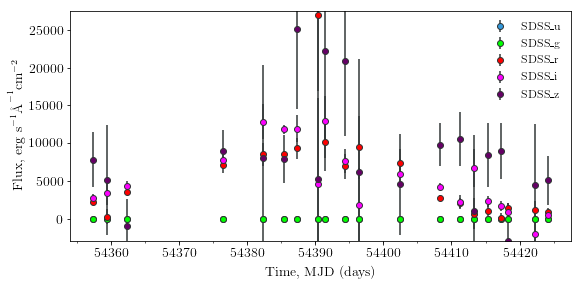

/Users/berto/projects/SDSS_sims/lcs/SN_000002.dat


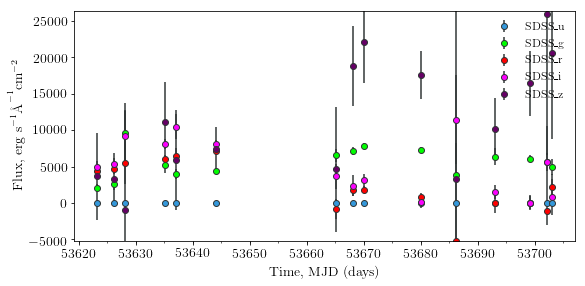

/Users/berto/projects/SDSS_sims/lcs/SN_000003.dat


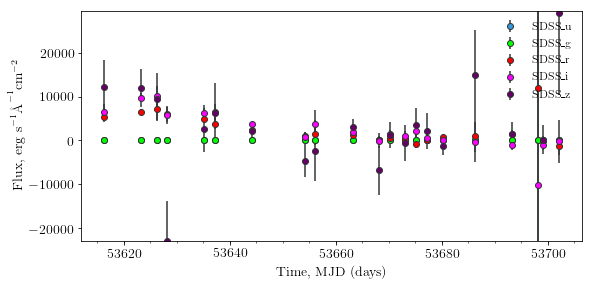

/Users/berto/projects/SDSS_sims/lcs/SN_000004.dat


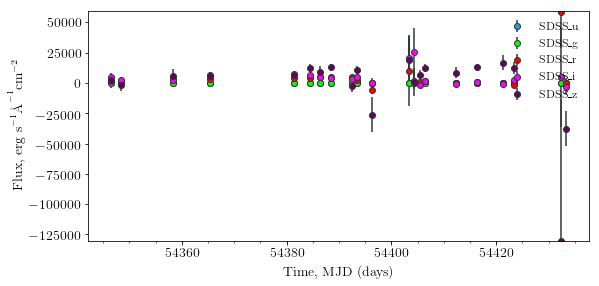

/Users/berto/projects/SDSS_sims/lcs/SN_000005.dat


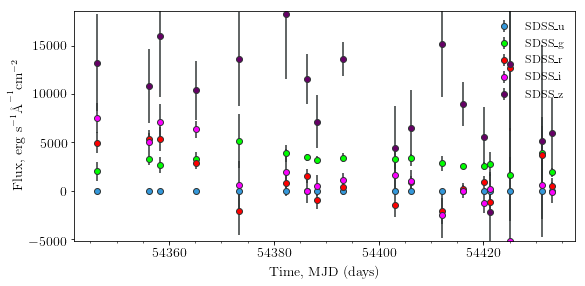

/Users/berto/projects/SDSS_sims/lcs/SN_000006.dat


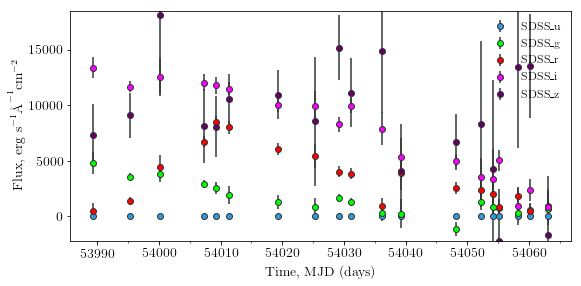

/Users/berto/projects/SDSS_sims/lcs/SN_000007.dat


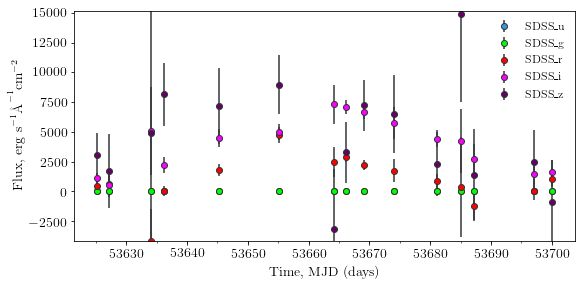

/Users/berto/projects/SDSS_sims/lcs/SN_000008.dat


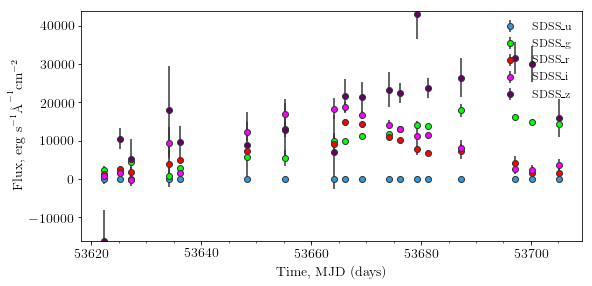

/Users/berto/projects/SDSS_sims/lcs/SN_000009.dat


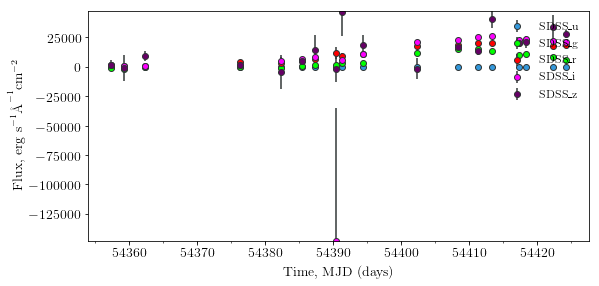

/Users/berto/projects/SDSS_sims/lcs/SN_000010.dat


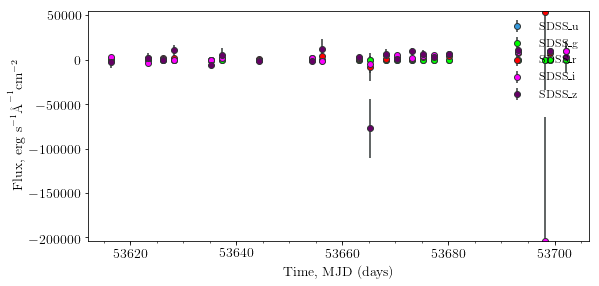

/Users/berto/projects/SDSS_sims/lcs/SN_000011.dat


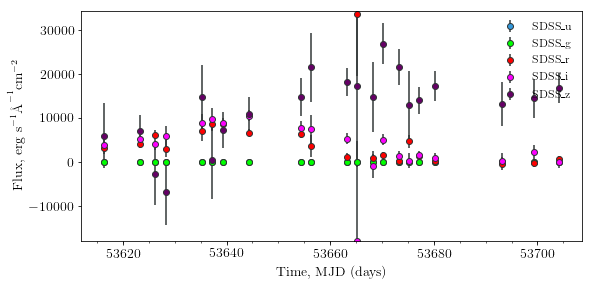

/Users/berto/projects/SDSS_sims/lcs/SN_000012.dat


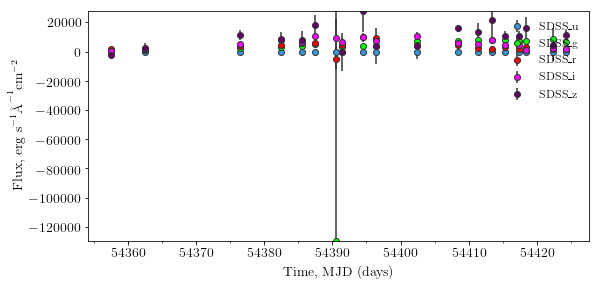

In [11]:
verbose = True
for i, snpath in enumerate(outlist):
    snpath = os.path.join(output_dir, snpath)
    if verbose: print(snpath)
    p = pcc.PhotometryClass()
    p.load(snpath)

    p.plot(enforce_zero=False)
    if i > 10:
        break

In [6]:
# df = pd.DataFrame()
verbose = False
alldata = {}
# list_list = ["host_EBV", "mjdmax", "z_sim"]
list_list = ["host_EBV", "mjdmax"]

for j, snlog in enumerate(log_list):
    snlog = os.path.join(log_dir, snlog)
    if verbose: print(snlog)
    with open(snlog, "r") as json_file:  
        data = json.load(json_file)
        json_file.close()
    if j == 0:
        for keystring in data.keys():
            if keystring != "flux" and keystring != "w":
                alldata[keystring] = []
            
    for keystring in data.keys():
#         print(keystring)
        if keystring != "flux" and keystring != "w":
            if keystring in list_list:
                alldata[keystring].append(data[keystring][0])
            else:
                alldata[keystring].append(data[keystring])
            
            
            

In [7]:
alldata.keys()

dict_keys(['CCD_index', 'MW_EBV', 'field', 'field_index', 'gentime', 'host_EBV', 'logpath', 'mag_offset', 'mjdmax', 'n', 'n_sne', 'snindex', 'snname', 'subtype', 'z_sim'])

In [8]:
output_df = pd.DataFrame.from_dict(alldata)

In [12]:
output_df

,CCD_index,MW_EBV,field,field_index,gentime,host_EBV,logpath,mag_offset,mjdmax,n,n_sne,snindex,snname,subtype,z_sim
0,375,0.031,82S,1,2017-07-06 14:05:39.121359,0.017415,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,[-0.3352409671720674],54387.050592,1,0,9,SN2005bf,Ib,0.275275
1,117,0.125,82N,0,2017-07-06 14:05:39.121359,0.052663,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,[0.008538133360179645],53641.863680,7,1,23,SN2005bf,Ib,0.215050
2,170,0.077,82N,0,2017-07-06 14:05:39.121359,0.003245,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,[-0.12499711796932839],53626.915971,20,2,9,SN2005bf,Ib,0.295870
3,419,0.028,82N,0,2017-07-06 14:05:39.121359,0.123367,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,[0.048145587626142156],54380.025271,24,3,13,SN2005bf,Ib,0.262860
4,159,0.074,82N,0,2017-07-06 14:05:39.121359,0.317600,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,[0.199345372337013],54353.151744,30,4,9,SN2005bf,Ib,0.173146
5,184,0.082,82N,0,2017-07-06 14:05:39.121359,0.286567,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,[-0.147043809196883],54011.165565,32,5,22,SN1993J,IIb,0.093377
6,71,0.076,82S,1,2017-07-06 14:05:39.121359,0.034631,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,[-0.3767863844885884],53655.244532,36,6,15,SN1993J,IIb,0.191817
7,178,0.059,82S,1,2017-07-06 14:05:39.121359,0.134065,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,[-0.04922846184733874],53664.377114,42,7,19,SN2005bf,Ib,0.146623
8,353,0.024,82S,1,2017-07-06 14:05:39.121359,0.092989,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,[0.058406226498757624],54415.053743,49,8,9,SN2005bf,Ib,0.131569
9,191,0.061,82N,0,2017-07-06 14:05:39.121359,0.011664,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,[-0.28212653334058935],53699.687988,50,9,17,SN2005bf,Ib,0.281390


246    37
419    36
401    35
485    32
107    30
206    30
226    29
236    29
201    29
166    29
261    29
400    29
285    29
437    29
399    28
192    28
152    28
395    28
379    28
233    28
355    28
403    28
263    28
439    28
169    28
448    28
299    27
291    27
384    27
128    27
       ..
36      7
9       7
275     6
3       6
77      6
542     5
545     5
551     5
11      5
544     5
552     5
538     4
550     4
553     3
549     3
559     3
547     3
556     2
557     2
554     2
561     2
563     2
567     1
560     1
569     1
546     1
562     1
548     1
566     1
555     1
Name: CCD_index, dtype: int64


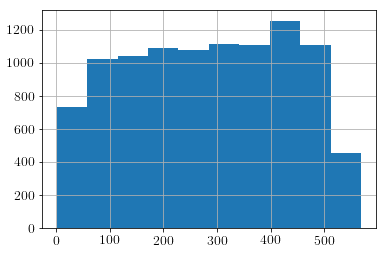

In [18]:
print(output_df["CCD_index"].value_counts())
output_df["CCD_index"].hist()

In [21]:
print(output_df["field"].value_counts())


82N    5001
82S    4999
Name: field, dtype: int64


23    746
9     745
6     745
18    739
24    727
17    711
7     701
13    701
12    691
10    674
19    654
14    336
2     325
21    325
0     310
22    304
15    277
3      50
4      44
5      39
20     38
1      35
11     31
16     26
8      26
Name: snindex, dtype: int64


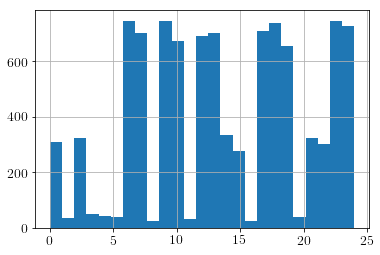

In [31]:
print(output_df["snindex"].value_counts())
output_df["snindex"].hist(bins = len(output_df["snindex"].unique()))

In [28]:
print(output_df["snname"].value_counts())


SN2005bf    7834
SN1993J     1877
SN1994I      289
Name: snname, dtype: int64


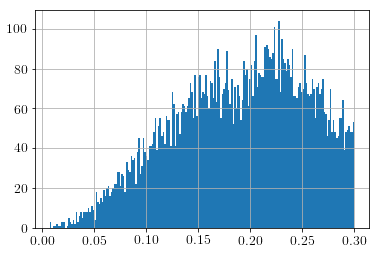

In [35]:
output_df["z_sim"].hist(bins = 200)

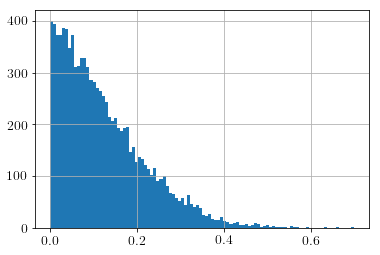

In [24]:
output_df["host_EBV"].hist(bins=100)

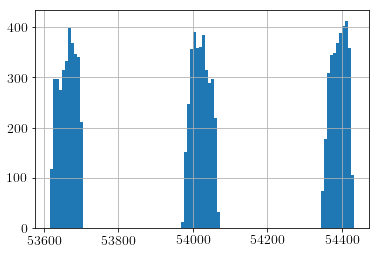

In [26]:
output_df["mjdmax"].hist(bins=100)